In [95]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(func, x_start=-8, x_end=8, name="", discrete=False):
    if name=="":
        name = func.__name__
    
    """
    绘制一个函数的图像。
    
    参数:
    - func: 要绘制的函数，它应该接受一个浮点数作为输入并返回一个浮点数。
    - x_start: x轴的起始值。
    - x_end: x轴的结束值。
    """
    # 创建x值的数组
    lenx = 1000 if not discrete else x_end-x_start
    x = np.linspace(x_start, x_end, lenx) if not discrete else [x for x in range(x_start,x_end+1)]
    # 计算y值
    y = [func(x1) for x1 in x]
    
    # 绘制图像
    plt.figure(figsize=(6, 2))
    if discrete:
        plt.scatter(x,y)
        for xi, yi in zip(x, y):
            plt.vlines(xi, 0, yi, color='gray', linestyle='dotted')  # 使用灰色点线
    else:
        plt.plot(x, y)
    
    # 设置图表标题和坐标轴标签
    plt.title(name)
    import inspect
    argspec = inspect.getfullargspec(func)
    argname = argspec.args[0]
    plt.xlabel(argname)
    plt.ylabel(f"{name}({argname})")
    plt.xticks(np.arange(x_start, x_end+1, 1))
    
    # 显示图像
    plt.show()

def plot_discrete(func, x_start=-8, x_end=8, name=""):
    plot_function(func,x_start,x_end,name,discrete=True)
# 举个例子，绘制函数y = sin(x)的图像

def plot_arr(x,y,xlabel="",ylabel="", y_max=None):
    plt.figure(figsize=(6, 2))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if y_max:
        plt.yticks(np.arange(0,y_max,2))
    plt.show()

def plot_arr_discrete(x,y,xlabel="",ylabel=""):
    plt.figure(figsize=(6, 2))
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for xi, yi in zip(x, y):
        plt.vlines(xi, 0, yi, color='gray', linestyle='dotted')  # 使用灰色点线
    plt.show()


def u(n):
    return 0 if n<0 else 1


# full模式下卷积后的零点为 h1的零点+h2的零点, same模式下为裁切至与h1的长度和零点相同

In [ ]:
def p(n):
    return 1 if n==0 else 0

def y(n):
    return p(n)+p(n-1)+p(n-2)

def z(n):
    sum = 0
    for m in range(-100,100):
        sum += y(n-4*m)
    return sum*4

plot_discrete(z)

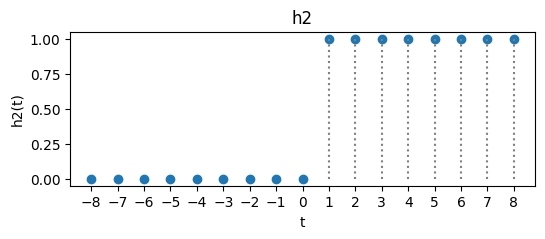

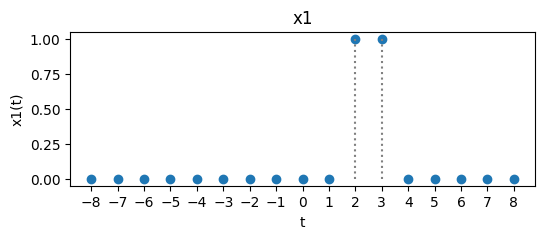

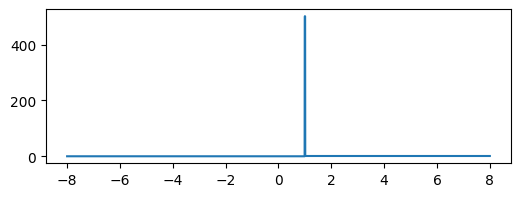

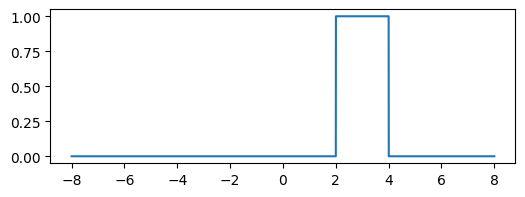

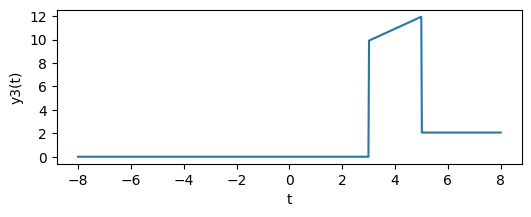

In [105]:
# HW2

# plot_function(u,discrete=True)


def h(t):
    return u(t+1)
# plot_function(h,-2,10)

def h(n):
    return ((1/2)**n)*u(n)

# plot_discrete(h,-2,10)
def h1(t):
    return 500 if abs(t-1)<0.01 else 0
# 这里会影响到积分！！
# 根据delta(t)的总面积为1的定义，如果希望总面积为10，以上的1000*(0.01*2)应等于10, *2是因为左右各有0.01，宽度为0.02

# plot_function(h1)

def h2(t):
    return u(t-1)
# plot_function(h2)


def x1(t):
        return u(t-2)-u(t-4)

def HW2_Q2_h():
    def h3(t):
        return 10 if t>=2 else 0
    # plot_function(h3)
    sample_count = 10000
    samples = np.linspace(-8,8,sample_count)
    h1_arr = np.array([h3(x) for x in samples])
    plot_arr(samples,h1_arr)
    h2_arr = np.array([x1(x) for x in samples])
    plot_arr(samples,h2_arr)
    h3_arr = np.convolve(h1_arr,h2_arr,'same')/sample_count*0.8*20

    plot_arr(samples,h3_arr,"t","y3(t)")


def h3(t):
    return h1(t)+h2(t)

plot_discrete(h2)
plot_discrete(x1)
sample_count = 10000
samples = np.linspace(-8,8,sample_count)
h1_arr = np.array([h3(x) for x in samples])
plot_arr(samples,h1_arr)
h2_arr = np.array([x1(x) for x in samples])
plot_arr(samples,h2_arr)
h3_arr = np.convolve(h1_arr,h2_arr,'same')/sample_count*16.5

plot_arr(samples,h3_arr,"t","y3(t)",13)



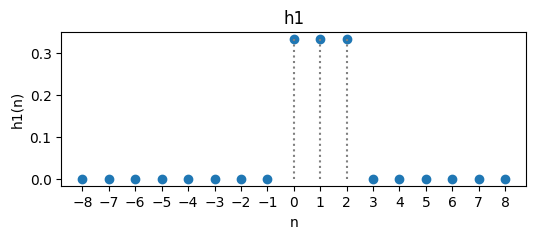

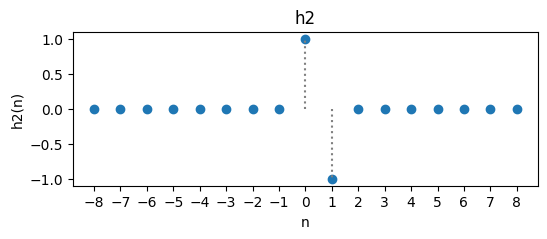

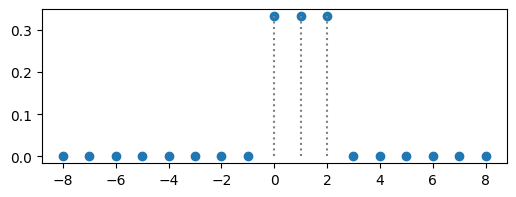

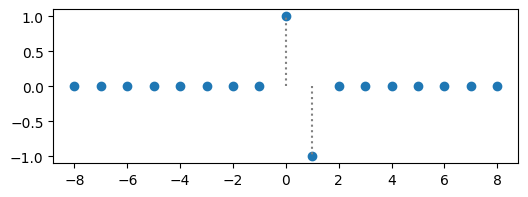

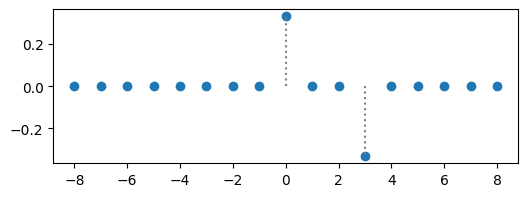

In [63]:
# Q3
def x(n):
    return n*(u(n-2)-u(n-8))
# plot_discrete(x,-12,12)

def d(n):
    return 1 if n==0 else 0

def h1(n):
    return (1/3) * (d(n)+d(n-1)+d(n-2))

def y(n):
    return (1/3) * (x(n)+x(n-1)+x(n-2))

# plot_discrete(y,-4,16)
def h2(n):
    return d(n)-d(n-1)
def y2(n):
    return x(n)-x(n-1)


plot_discrete(h1)
plot_discrete(h2)

samples = np.arange(-8, 8+1, 1)
h1_arr = np.array([h1(x) for x in samples])
plot_arr_discrete(samples,h1_arr)
h2_arr = np.array([h2(x) for x in samples])
plot_arr_discrete(samples,h2_arr)
h3_arr = np.convolve(h1_arr,h2_arr,'same')
plot_arr_discrete(samples, h3_arr)